In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sn
import matplotlib.pyplot as plt

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  88 out of  88 | elapsed:    0.9s finished

[2022-10-03 13:22:43] Features: 1/2 -- score: 1.0[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  72 out of  87 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  87 out of  87 | elapsed:    0.0s finished

[2022-10-03 13:22:43] Features: 2/2 -- score: 1.0

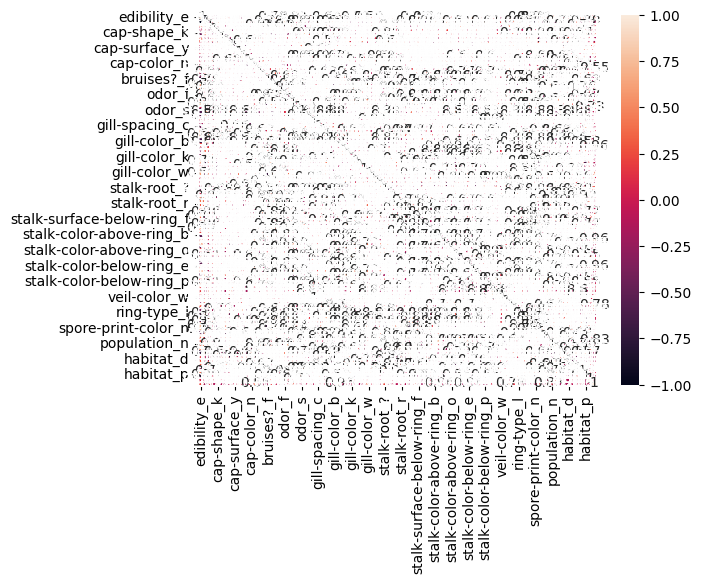

In [37]:
data = pd.read_csv('./data/agaricus-lepiota.data')
dummies = pd.get_dummies(pd.read_csv('./data/agaricus-lepiota.data'))
#print(mushroom.describe())

sel = VarianceThreshold(threshold=0.01)
sel.fit_transform(dummies)

quasi_constant = [col for col in dummies.columns if col not in sel.get_feature_names_out()]
len(quasi_constant)

train = dummies[sel.get_feature_names_out()]
corr_matrix = train.corr()
corr_features = [feature for feature in corr_matrix.columns if (corr_matrix[feature].iloc[:corr_matrix.columns.get_loc(feature)] > 0.8).any()]

X = dummies.drop(['edibility_e'] + quasi_constant + corr_features, axis=1)
y = dummies['edibility_e']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=42)
sfs = SFS(SVC(), k_features=2, verbose=2, cv=2, n_jobs=8)
sfs.fit(X_train, y_train)

sn.heatmap(data.corr(), annot=True)
plt.show()

#y = X[1:]
#y.describe()
#
### TODO convert to dummy
#
#print(X.shape)
#print(y.shape)
#
#skb = SelectKBest(chi2, k=2)
#skb.fit(X, y)
#X_new = skb.transform(X)
#
#print(X_new.shape)
#
## Fetch the selected feature indices and print the corresponding feature names
#np.array(df.feature_names)[skb.get_support(indices=True)]

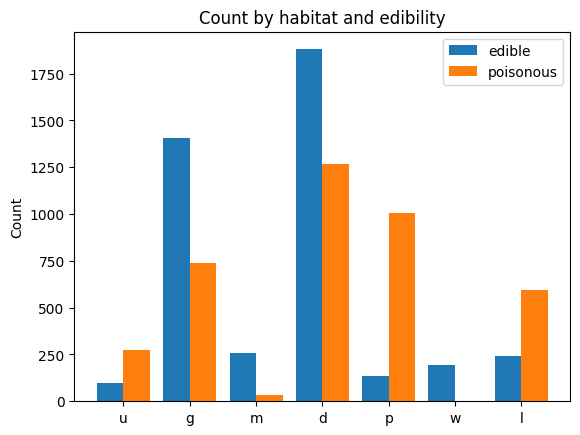

In [3]:
habitats = df['habitat'].unique()

he = dict.fromkeys(habitats, 0)
hp = dict.fromkeys(habitats, 0)

for index, row in df.iterrows():
    if row['edibility'] == 'e': he[row["habitat"]] += 1
    elif row['edibility'] == 'p': hp[row["habitat"]] += 1

edible_counts = he.values()
poisonous_counts = hp.values()

x = np.arange(len(habitats))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, edible_counts, width, label='edible')
rects2 = ax.bar(x + width/2, poisonous_counts, width, label='poisonous')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count by habitat and edibility')
ax.set_xticks(x)
ax.set_xticklabels(habitats)
ax.legend()

plt.show()

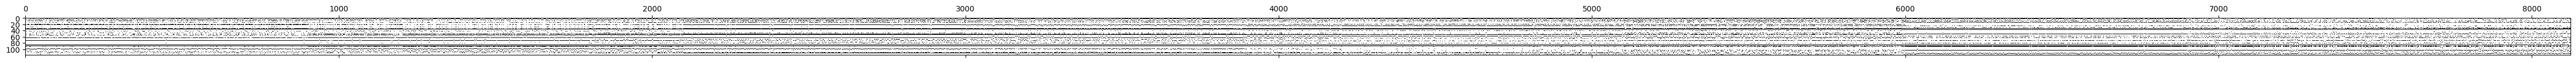

In [4]:
dummies = pd.get_dummies(df).transpose()

plt.spy(dummies)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

['e', 'p']


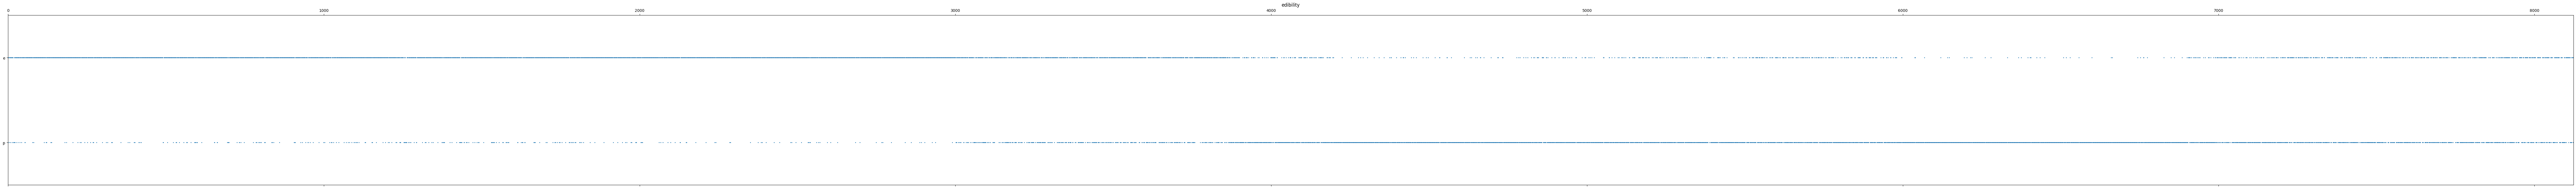

['b', 'c', 'f', 'k', 's', 'x']


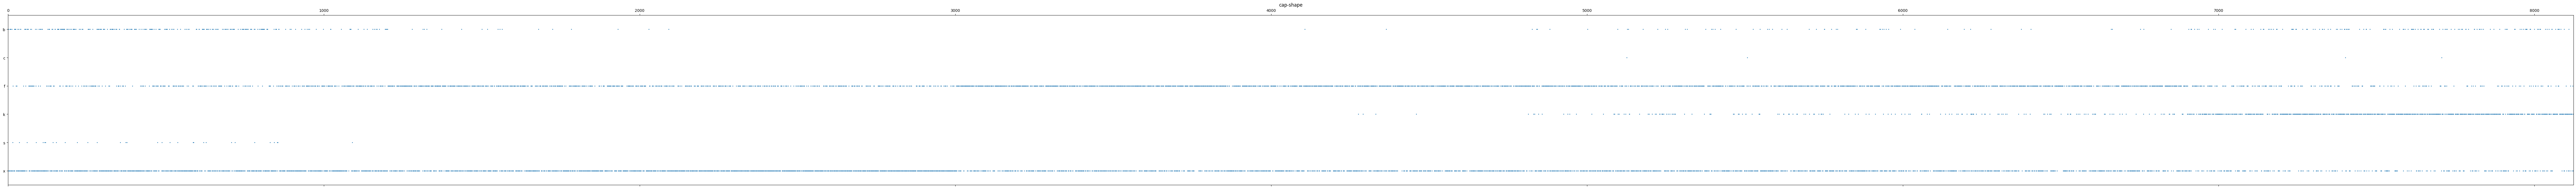

['f', 'g', 's', 'y']


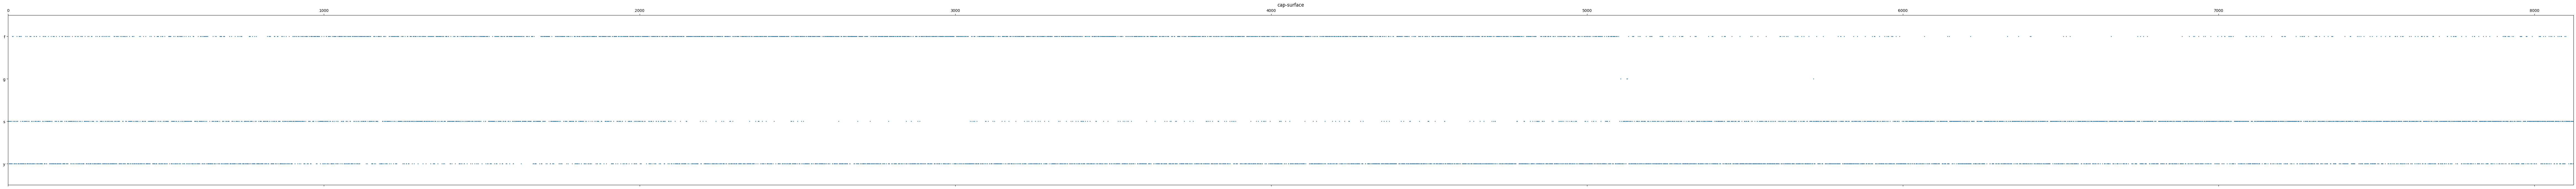

['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']


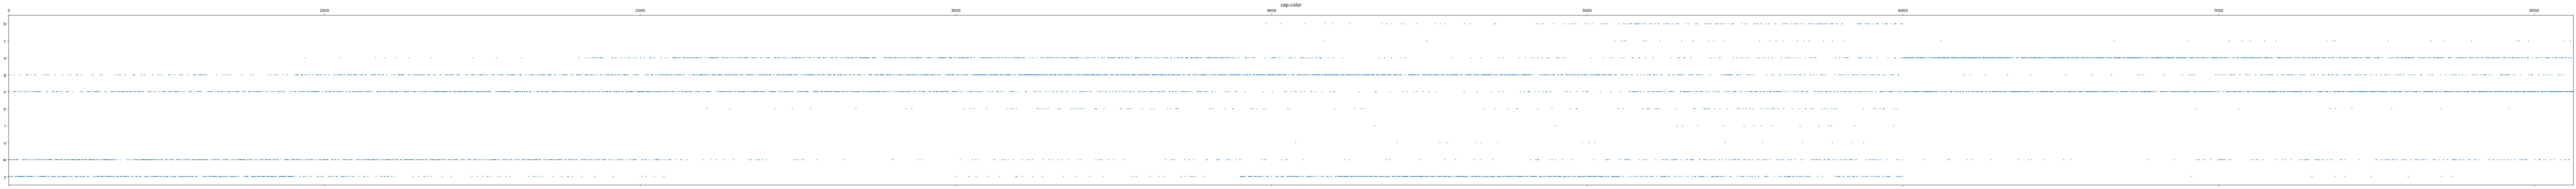

['f', 't']


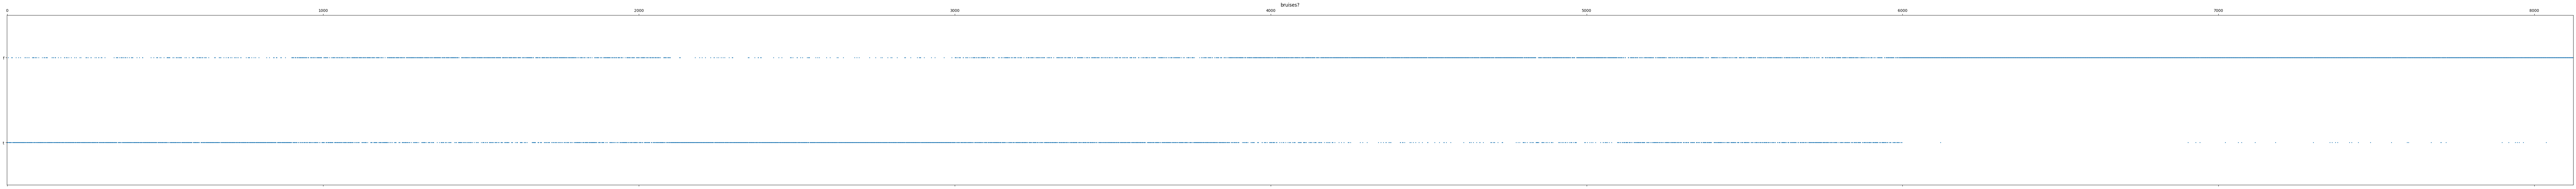

['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']


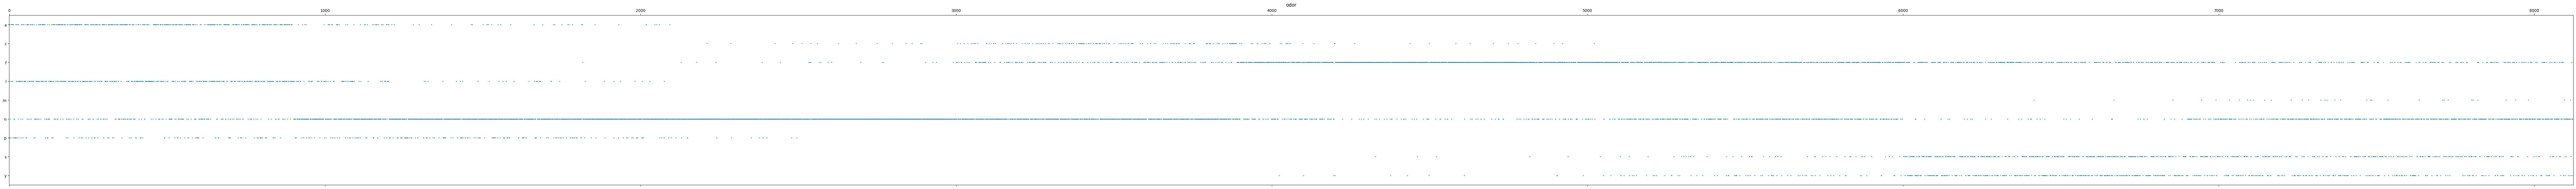

['a', 'f']


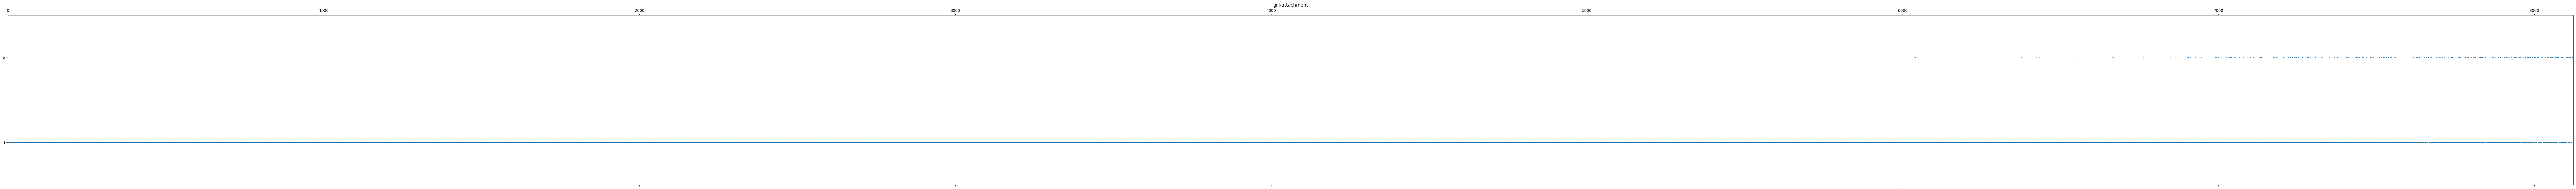

['c', 'w']


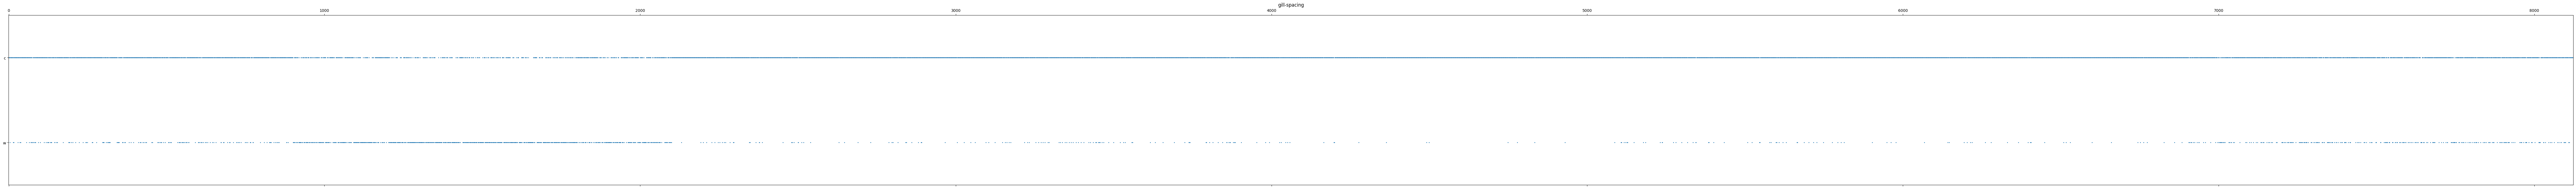

['b', 'n']


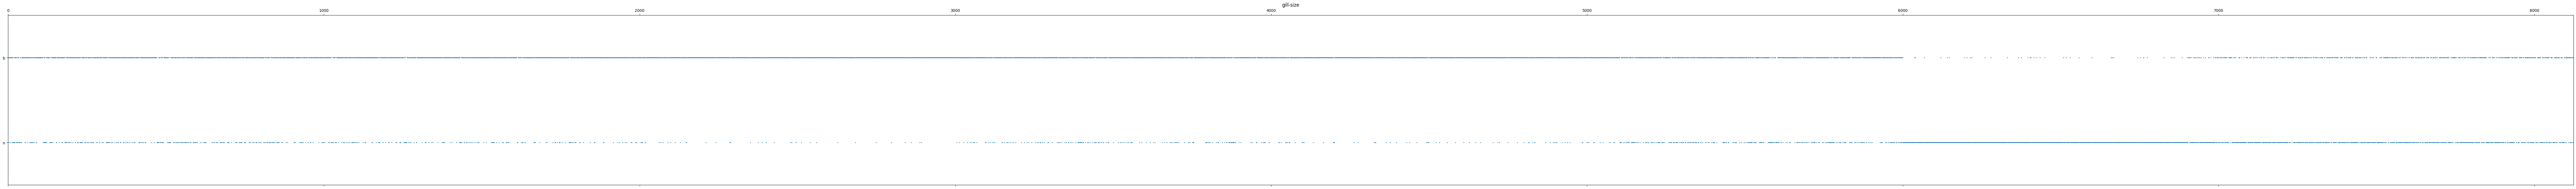

['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']


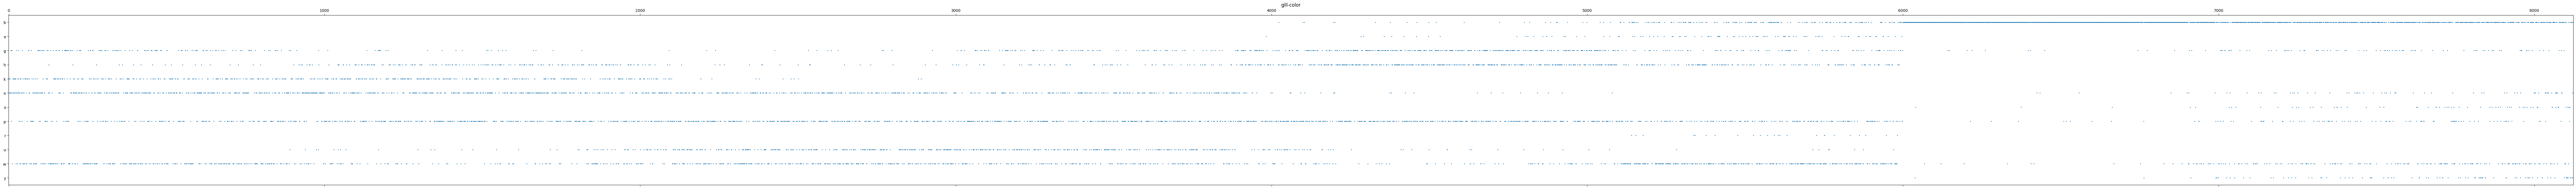

['e', 't']


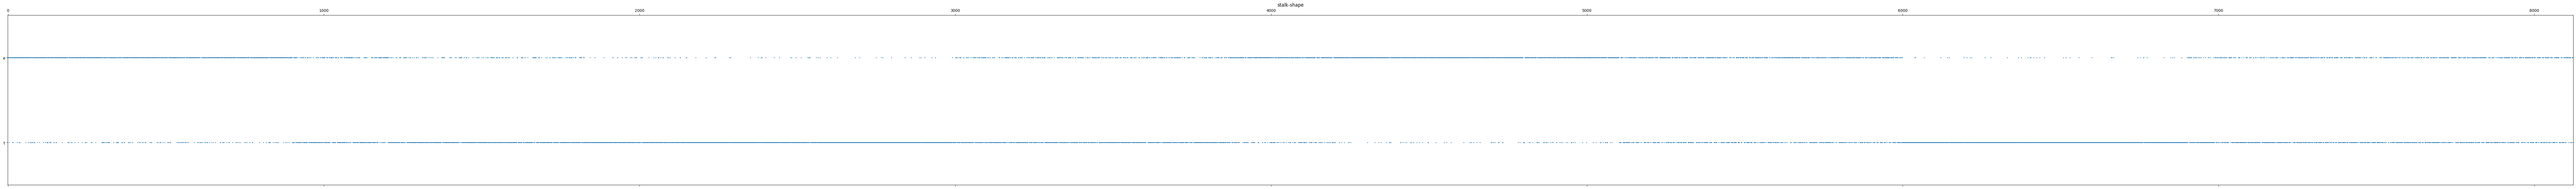

['?', 'b', 'c', 'e', 'r']


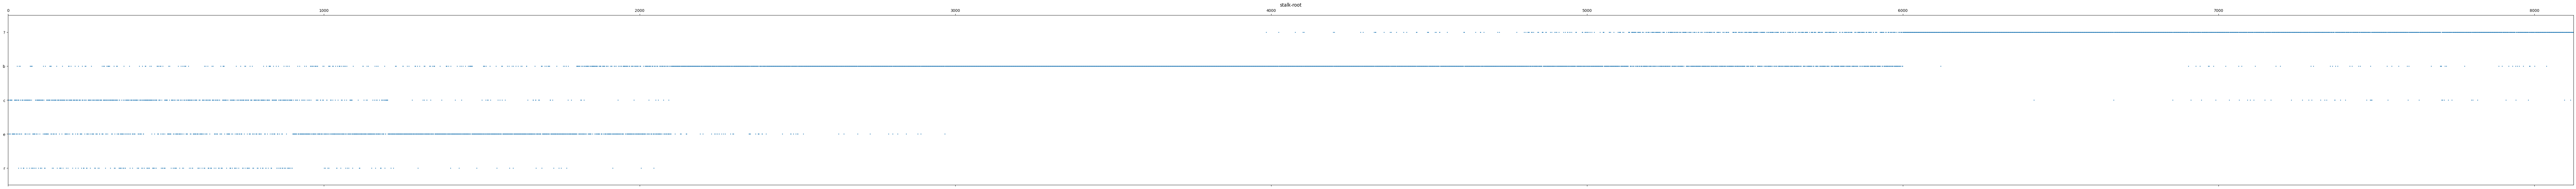

['f', 'k', 's', 'y']


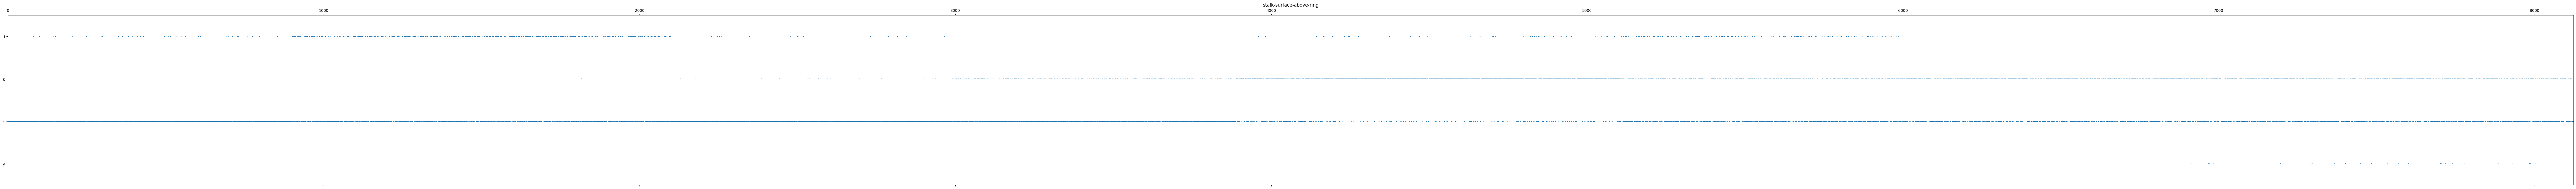

['f', 'k', 's', 'y']


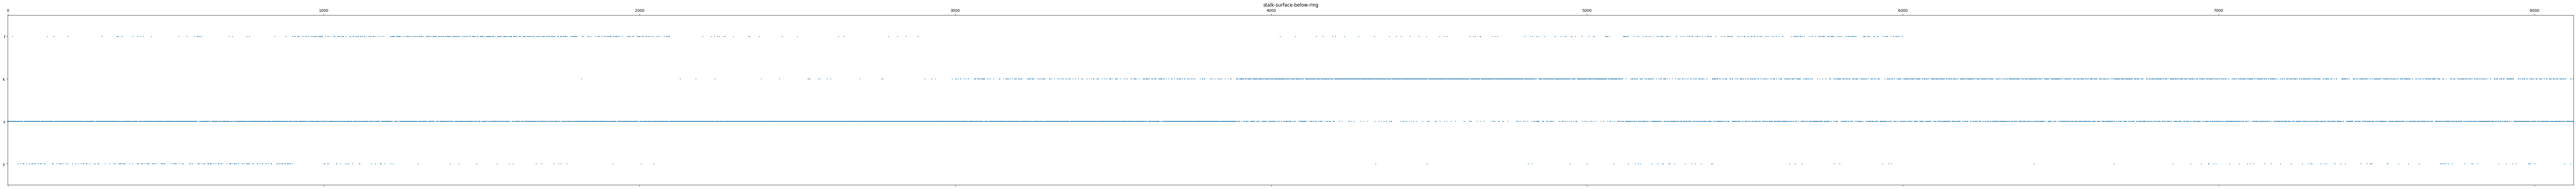

['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']


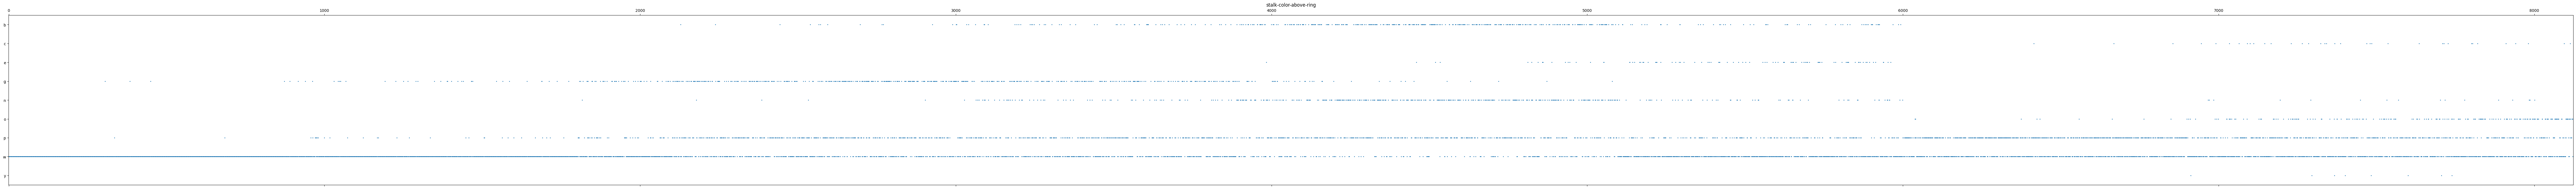

['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']


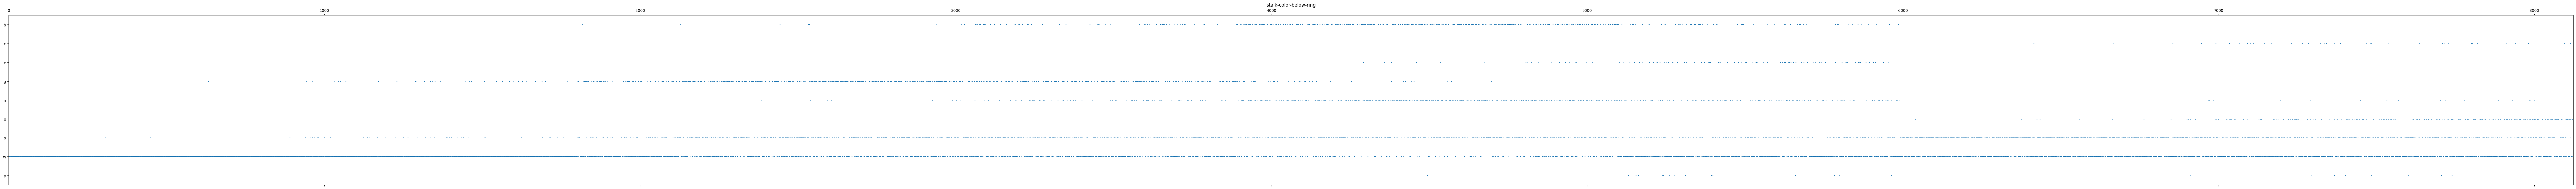

['p']


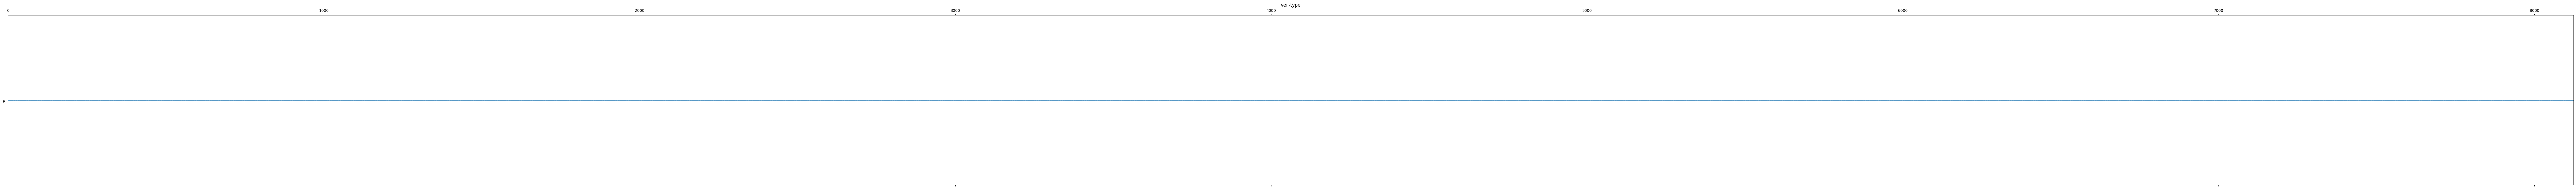

['n', 'o', 'w', 'y']


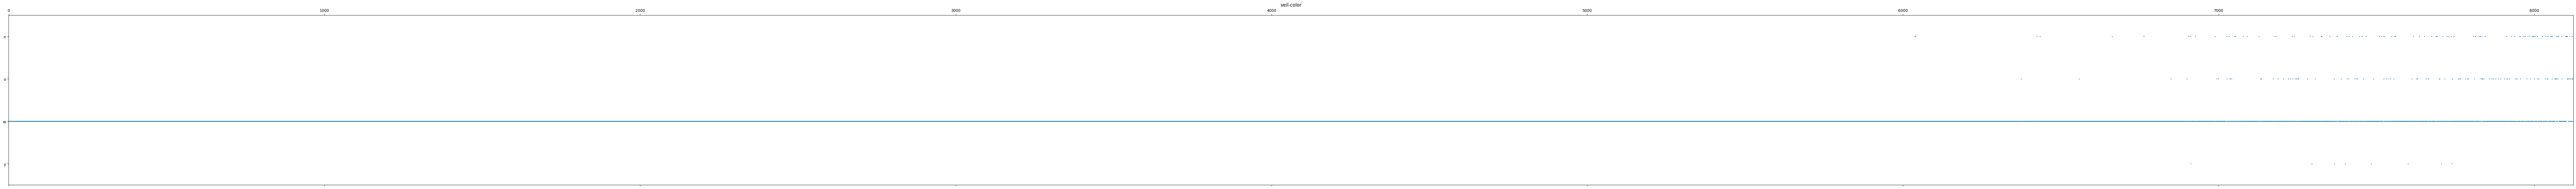

['n', 'o', 't']


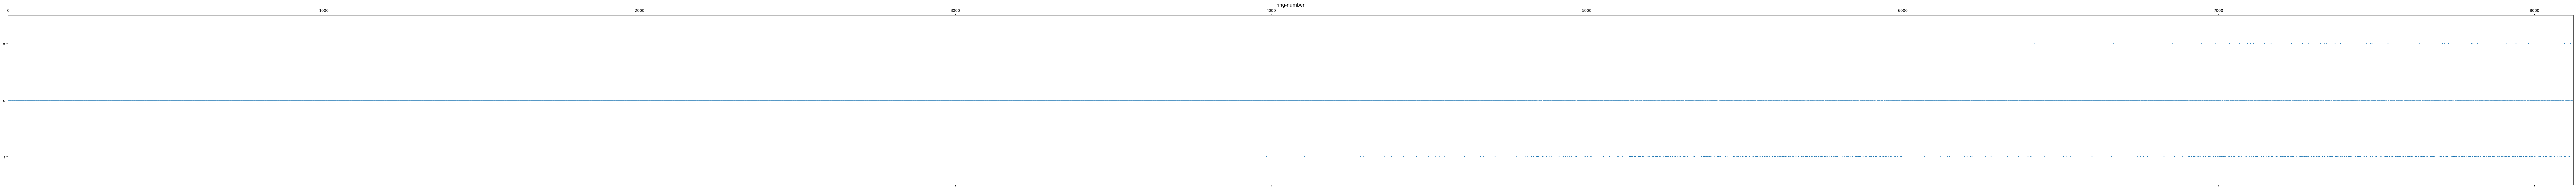

['e', 'f', 'l', 'n', 'p']


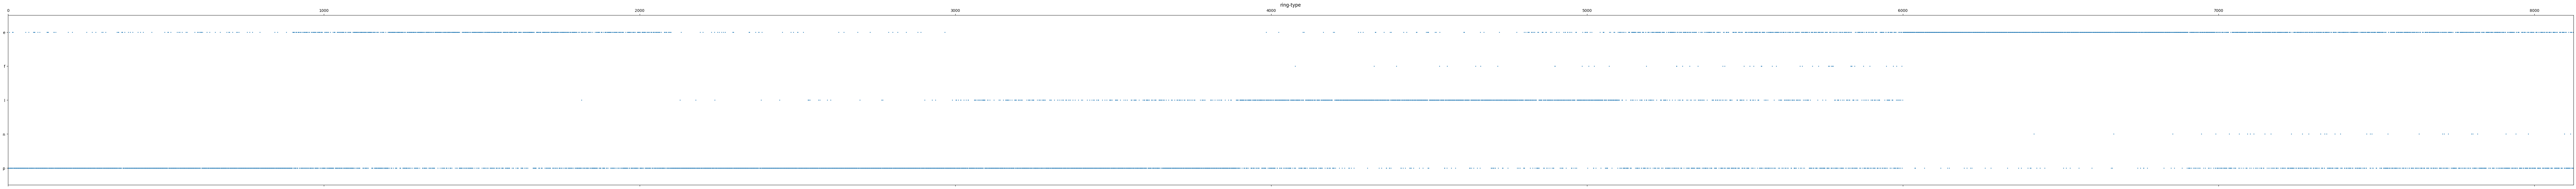

['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y']


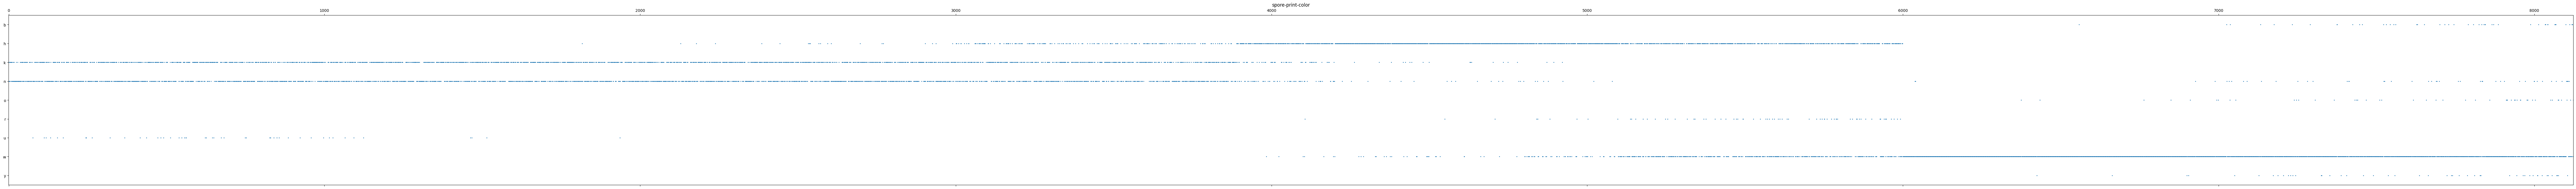

['a', 'c', 'n', 's', 'v', 'y']


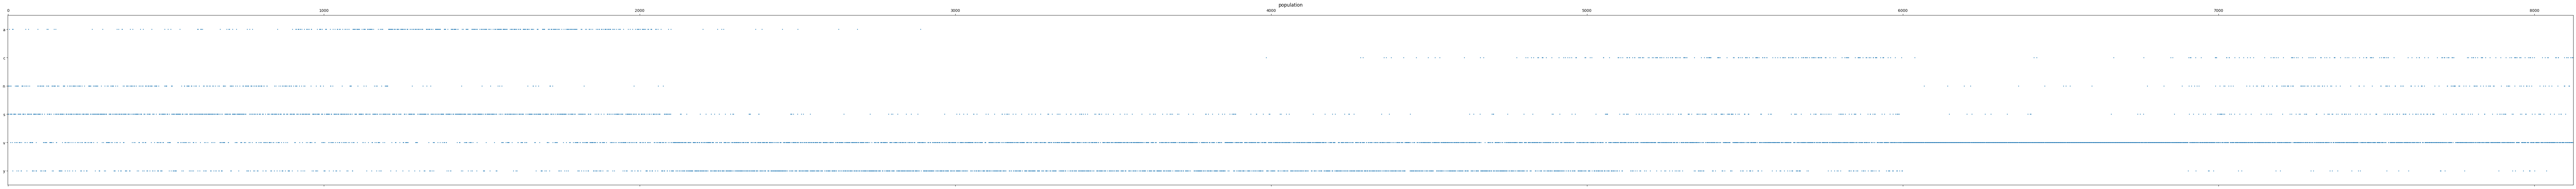

['d', 'g', 'l', 'm', 'p', 'u', 'w']


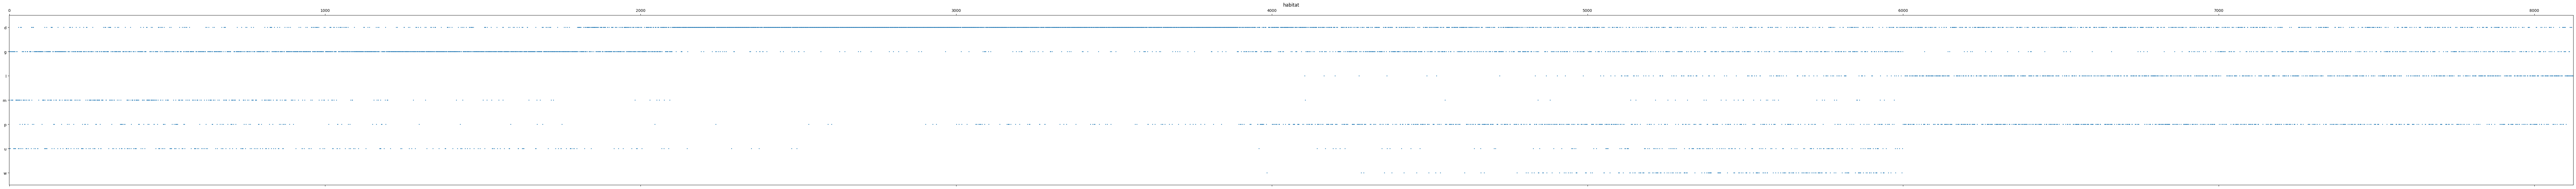

In [5]:


for column in df.columns:
    dummy = pd.get_dummies(df[column]).transpose()
    print(list(dummy.index))
    plt.spy(dummy, markersize=1)
    fig = plt.gcf()
    fig.set_size_inches(120, 8)
    axs = plt.gca()
    axs.set_aspect('auto')
    axs.set_yticks(range(len(dummy.index)))
    axs.set_yticklabels(list(dummy.index))
    plt.title(column)
    plt.plot()
    plt.show()